## Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
imblearn.__version__
%matplotlib inline
dataset = pd.read_csv('Predictive_maintenance.csv');


## Exploratory Data Analysis

In [2]:
dataset.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
dataset.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
dataset.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
dataset.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [6]:
dataset.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

### Histogram

In [7]:
dataset2=dataset.drop(columns=['UDI', 'Product ID', 'Type'])

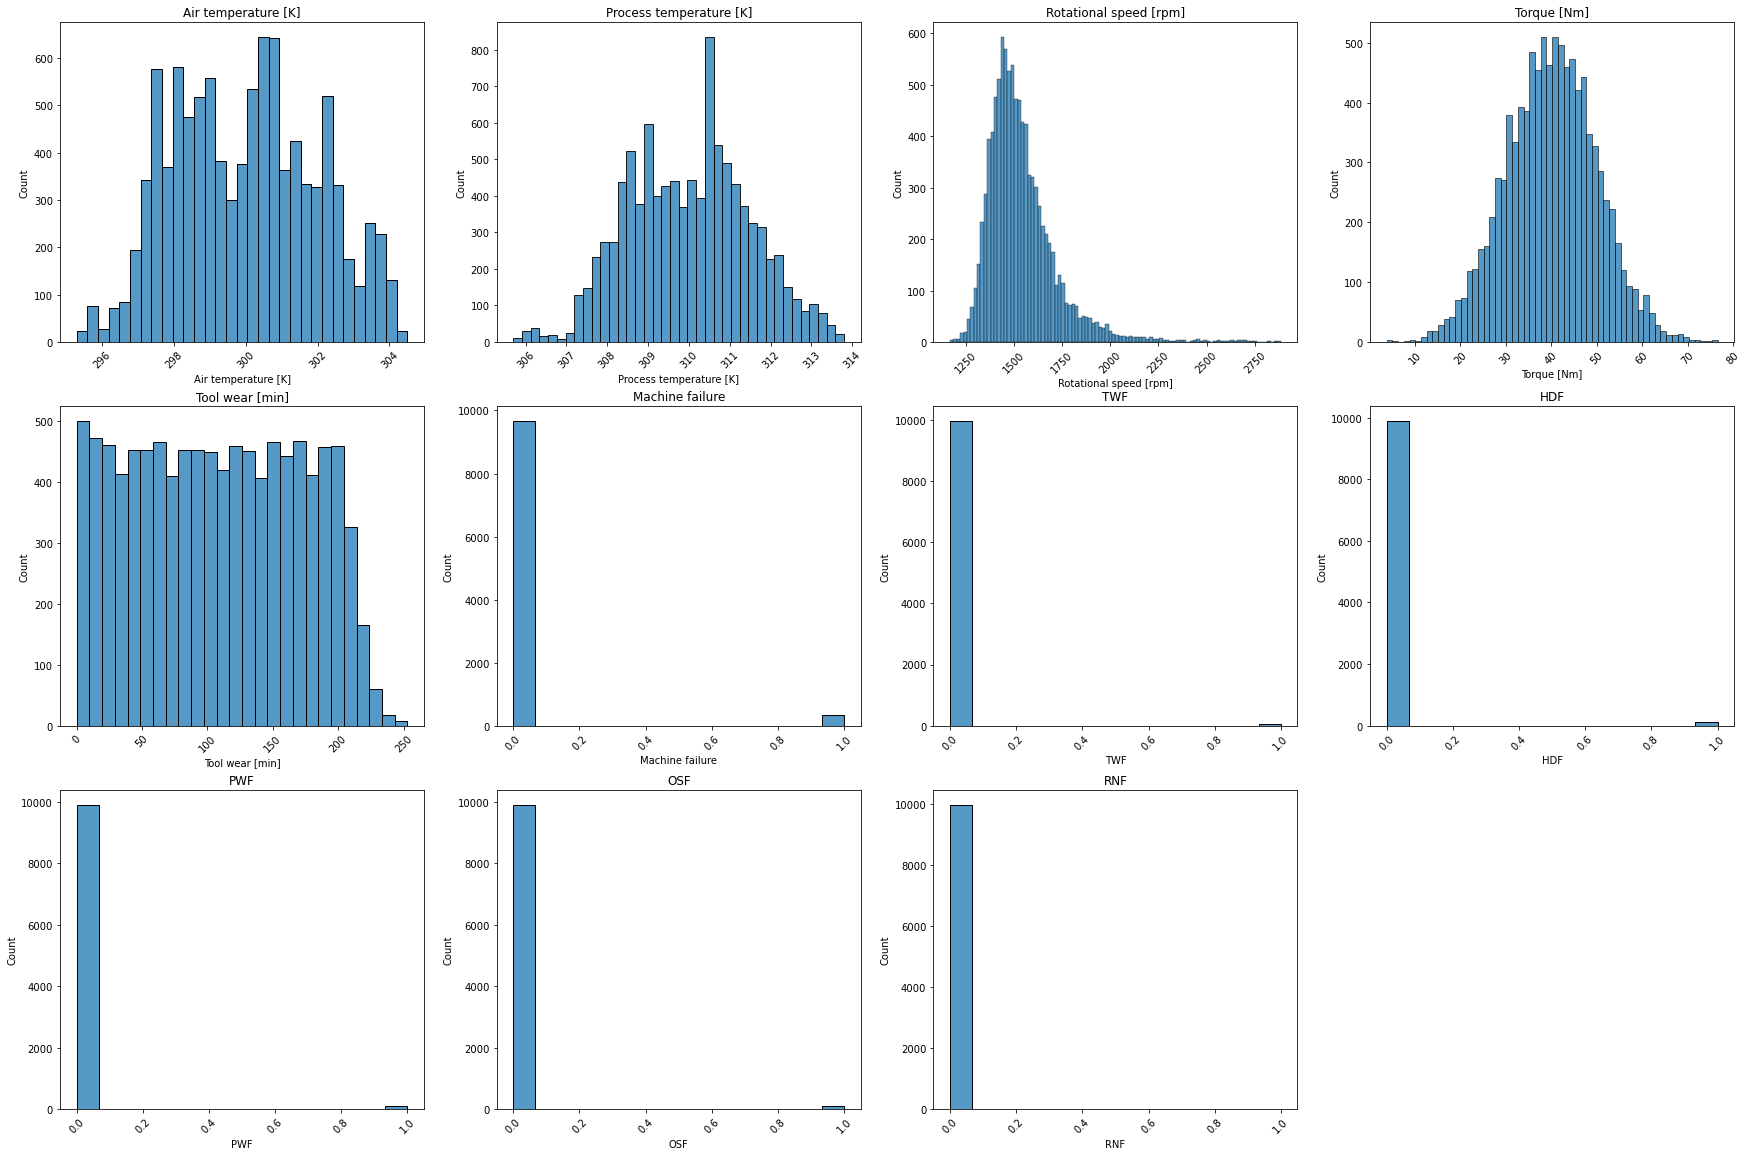

In [8]:
plt.figure(figsize=(30,20))
for i,col in enumerate(dataset2.columns,1):
    plt.subplot(3,4,i)
    sns.histplot(dataset2[col])
    f= plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    plt.xticks(rotation=45)

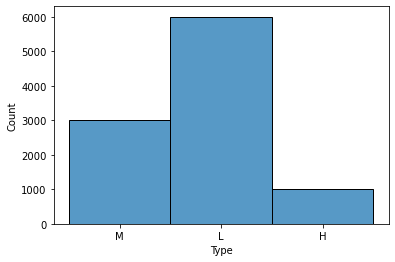

In [9]:
sns.histplot(dataset['Type'])
f= plt.gca()


### Identifying and Removing Outliers

In [10]:
num_cols = dataset.select_dtypes(include=['int64','float64'])

In [11]:
dataset3=num_cols.drop(columns=['UDI'])

In [12]:
dataset3

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


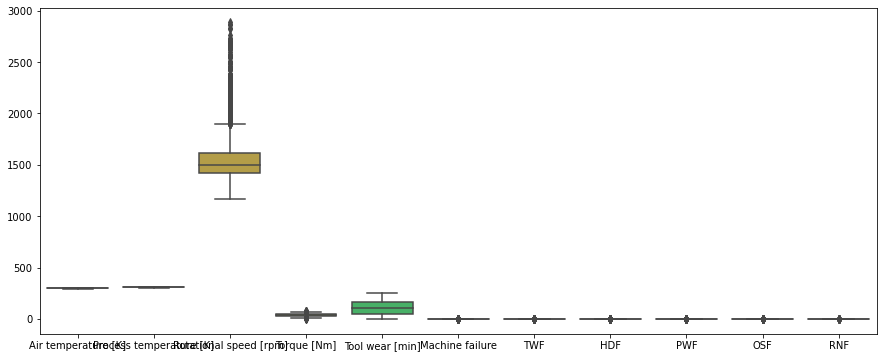

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset3)
plt.show()

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [15]:
for i in dataset3.columns:
    lower_range, upper_range = remove_outlier(dataset3[i])
    dataset3[i] = np.where(dataset3[i] > upper_range, upper_range, dataset3[i])
    dataset3[i] = np.where(dataset3[i] < lower_range, lower_range, dataset3[i])

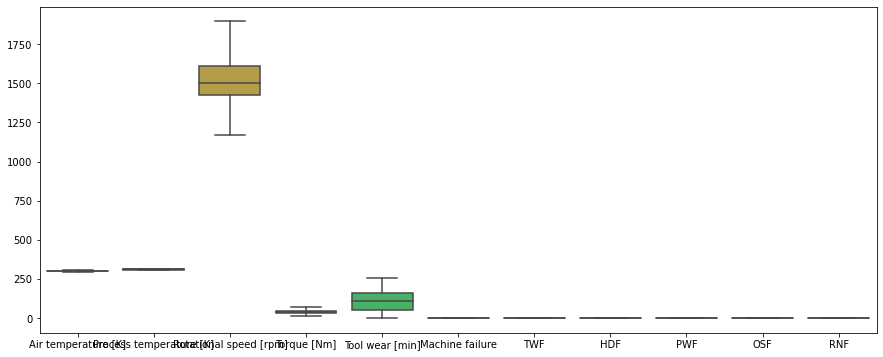

In [16]:
#Check Outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset3)
plt.show()

### Correlation

<AxesSubplot:title={'center':'Correlation with Response variable'}>

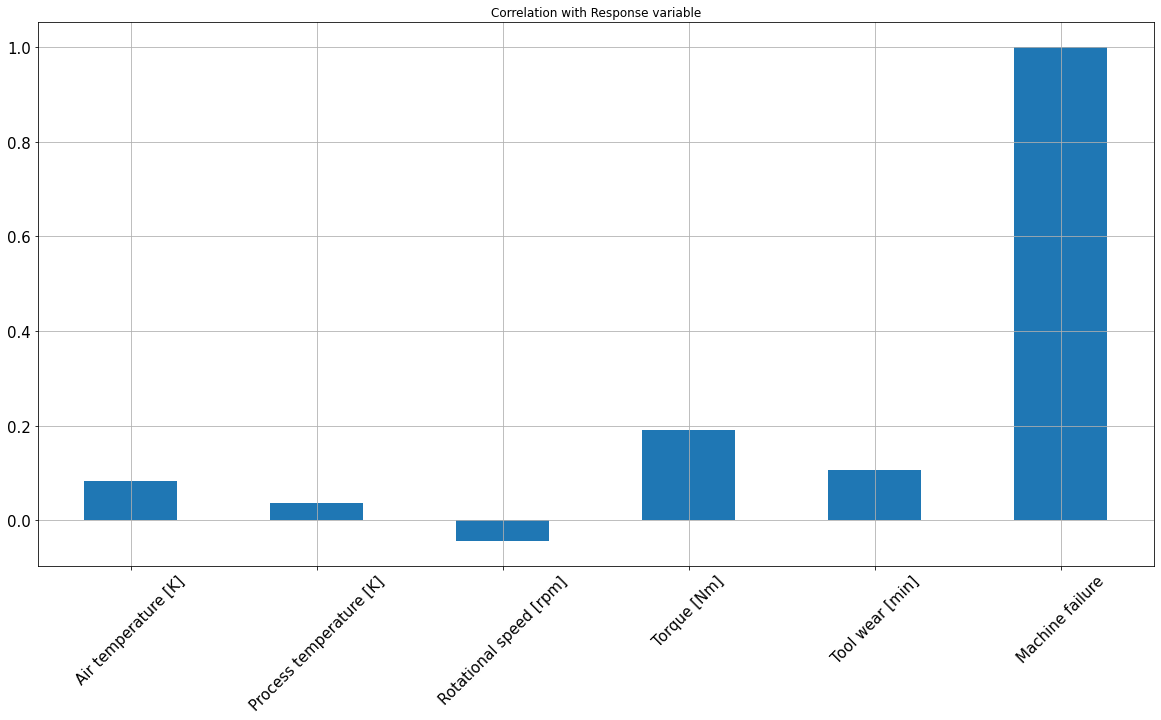

In [17]:
dataset.drop(columns=['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']).corrwith(dataset['Machine failure']).plot.bar(figsize=(20,10),title='Correlation with Response variable',fontsize =15, rot =45,grid=True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_16436\3092605436.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


<AxesSubplot:>

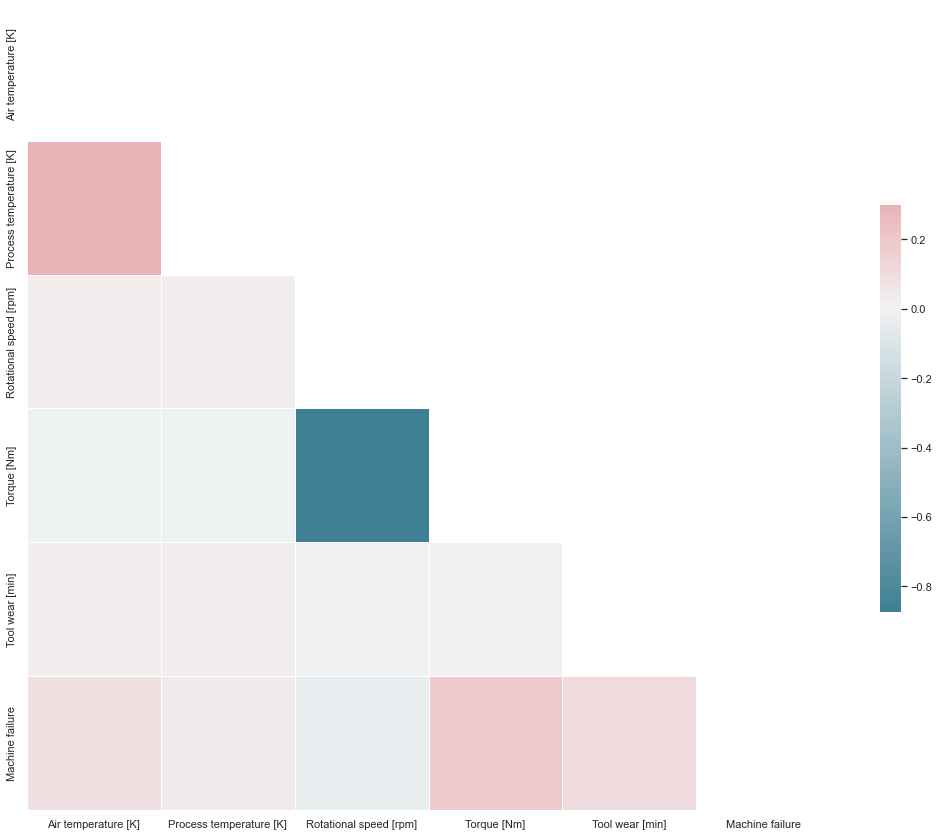

In [18]:
corr = dataset.drop(columns=['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']).corr()
sns.set(style='white')
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax =plt.subplots(figsize=(18,15))
cmap =sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})


In [19]:
corr

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


In [20]:
dataset4 = dataset.drop(columns=['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF','RNF'])
def correlation(dataset4, threshold):
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset4.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [21]:
corr_features = correlation(dataset4, 0.75)
len(set(corr_features))

0.8761071581166637 Process temperature [K] Air temperature [K]
0.8750270862996037 Torque [Nm] Rotational speed [rpm]


2

In [22]:
corr_features

{'Air temperature [K]', 'Rotational speed [rpm]'}

In [23]:
dataset5 = dataset4.drop(columns=['Air temperature [K]', 'Rotational speed [rpm]'])

In [24]:
dataset5.head()

,Type,Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,M,308.6,42.8,0,0
1,L,308.7,46.3,3,0
2,L,308.5,49.4,5,0
3,L,308.6,39.5,7,0
4,L,308.7,40.0,9,0


## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset5['Type']=le.fit_transform(dataset5['Type'])

In [26]:
dataset5.head()

,Type,Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,308.6,42.8,0,0
1,1,308.7,46.3,3,0
2,1,308.5,49.4,5,0
3,1,308.6,39.5,7,0
4,1,308.7,40.0,9,0


## Splitting data into Train and Test data

In [27]:
X= dataset5.drop(columns=['Machine failure'])
y= dataset5['Machine failure']

In [28]:
print(X)

      Type  Process temperature [K]  Torque [Nm]  Tool wear [min]
0        2                    308.6         42.8                0
1        1                    308.7         46.3                3
2        1                    308.5         49.4                5
3        1                    308.6         39.5                7
4        1                    308.7         40.0                9
...    ...                      ...          ...              ...
9995     2                    308.4         29.5               14
9996     0                    308.4         31.8               17
9997     2                    308.6         33.4               22
9998     0                    308.7         48.5               25
9999     2                    308.7         40.2               30

[10000 rows x 4 columns]


In [29]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64


In [30]:
X.value_counts()

Type  Process temperature [K]  Torque [Nm]  Tool wear [min]
1     308.4                    39.4         0                  2
0     305.9                    37.2         197                1
1     312.4                    36.8         237                1
                               32.7         175                1
                               33.0         15                 1
                                                              ..
      309.5                    46.3         203                1
                               47.9         112                1
                                            127                1
                               48.1         159                1
2     313.8                    44.9         136                1
Length: 9999, dtype: int64

### Handling Imbalanced Datasets

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X,y)

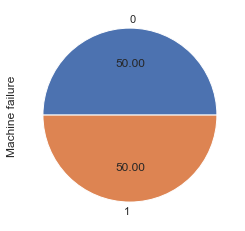

In [32]:
ax= y_res.value_counts().plot.pie(autopct='%.2f')

In [33]:
print(y_res)

0        0
1        0
2        0
3        0
4        0
        ..
19317    1
19318    1
19319    1
19320    1
19321    1
Name: Machine failure, Length: 19322, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)


## Model Building

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
y_pred=classifier_lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression ', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [38]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.742289,0.741513,0.747321,0.744406


Test Data Accuracy: 0.7423


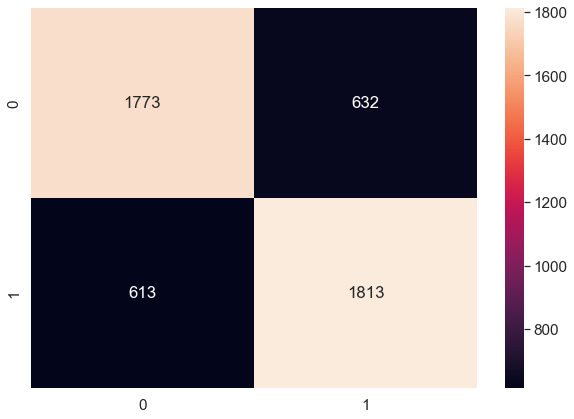

In [39]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc= RandomForestClassifier(random_state=0, n_estimators =100, criterion ='entropy')
classifier_rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred = classifier_rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_16436\2332178342.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [42]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.742289,0.741513,0.747321,0.744406
1,Random Forest (n=100),0.897951,0.983976,0.809975,0.888537


Test Data Accuracy: 0.8980


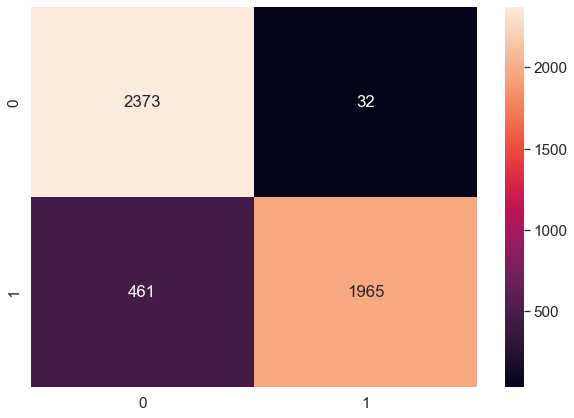

In [43]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Linear SVM

In [44]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=0, kernel='linear')
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [45]:
y_pred = classifier_svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_16436\3503285175.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [46]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.742289,0.741513,0.747321,0.744406
1,Random Forest (n=100),0.897951,0.983976,0.809975,0.888537
2,SVM (Linear),0.758435,0.776218,0.729184,0.751966


Test Data Accuracy: 0.7584


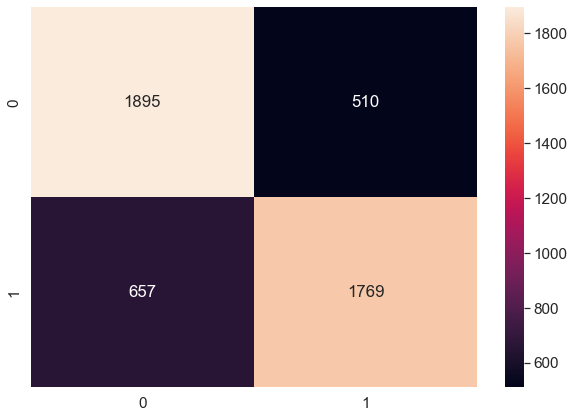

In [47]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## RBF SVM

In [48]:
from sklearn.svm import SVC
classifier_rbf = SVC(random_state = 0, kernel = 'rbf')
classifier_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [49]:
y_pred = classifier_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_16436\2044543338.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [50]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.742289,0.741513,0.747321,0.744406
1,Random Forest (n=100),0.897951,0.983976,0.809975,0.888537
2,SVM (Linear),0.758435,0.776218,0.729184,0.751966
3,SVM (RBF),0.877044,0.852037,0.913850,0.881862


Test Data Accuracy: 0.8770


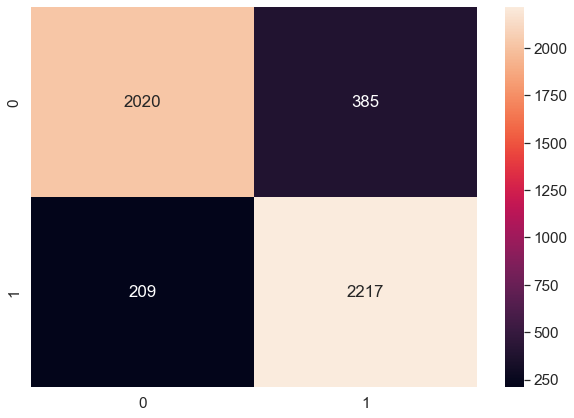

In [51]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Applying K-Fold Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rfc ,
                             X = X_train,
                             y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: {:.2f}".format(accuracies.mean()*100))
print("Random Forest Classifier Standard Deviation: {:.2f}".format(accuracies.std()*100))

Random Forest Classifier Accuracy: 99.16
Random Forest Classifier Standard Deviation: 0.23


### Hyperparameter Tuning

### Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV
parameters_rfc = { 
    'n_estimators': [40, 41, 42, 43], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [6, 7, 8], 
    'max_leaf_nodes': [11, 12, 13], 
} 
RFC_grid = GridSearchCV(classifier_rfc,param_grid=parameters_rfc,cv=3,scoring='accuracy')
RFC_grid_model = RFC_grid.fit(X_train, y_train)
y_pred_grid= RFC_grid_model.predict(X_test)

In [67]:
best_hyperarameters = RFC_grid.best_params_
best_score = RFC_grid_model.best_score_
Accuracy = accuracy_score(y_test,y_pred_grid)
grid_results = pd.DataFrame([[best_hyperarameters, best_score, Accuracy]],
               columns = ['Best Hyperparameters','Best score','Accuracy'])

#### Results

In [68]:
grid_results

,Best Hyperparameters,Best score,Accuracy
0,"{'max_depth': 8, 'max_features': 'sqrt', 'max_...",0.889035,0.882633


In [69]:
best_hyperarameters


{'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': 13,
 'n_estimators': 42}